# Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotions={0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
df=pd.read_csv('fer2013/fer2013.csv')

In [3]:
df.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [5]:
df.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [7]:
df['emotion'].value_counts(normalize=True)

3    0.250481
6    0.172709
4    0.169337
2    0.142698
0    0.138017
5    0.111517
1    0.015242
Name: emotion, dtype: float64

In [8]:
import seaborn as sns

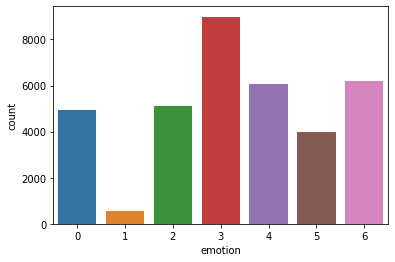

In [9]:
sns.countplot(df.emotion);

In [10]:
df['Usage'].value_counts(normalize=True)

Training       0.799983
PublicTest     0.100008
PrivateTest    0.100008
Name: Usage, dtype: float64

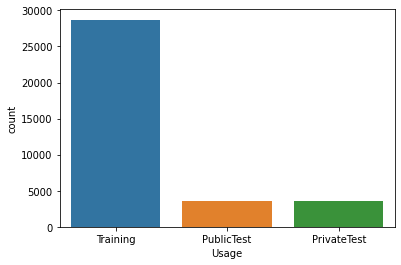

In [11]:
sns.countplot(df.Usage);

In [12]:
df.sample(5)

,emotion,pixels,Usage
30428,1,2 8 27 43 57 73 88 104 118 131 144 159 170 177...,PublicTest
26025,0,186 187 189 186 189 166 47 36 54 64 66 71 69 6...,Training
34275,5,209 195 179 185 184 184 175 185 182 185 182 18...,PrivateTest
35881,0,181 177 176 156 178 144 136 132 122 107 131 16...,PrivateTest
332,5,238 69 24 32 34 33 27 30 41 49 60 64 47 65 80 ...,Training


In [13]:
len(df['pixels'][0].split())

2304

In [14]:
df['pixels']=df['pixels'].apply(lambda x:((np.reshape(x.split(),(48,48,1))).astype(np.float32))/255) 

In [15]:
df['pixels']

0        [[[0.27450982], [0.3137255], [0.32156864], [0....
1        [[[0.5921569], [0.5882353], [0.5764706], [0.60...
2        [[[0.90588236], [0.83137256], [0.6117647], [0....
3        [[[0.09411765], [0.1254902], [0.14117648], [0....
4        [[[0.015686275], [0.0], [0.0], [0.0], [0.0], [...
                               ...                        
35882    [[[0.19607843], [0.14117648], [0.06666667], [0...
35883    [[[0.69803923], [0.68235296], [0.6745098], [0....
35884    [[[0.06666667], [0.06666667], [0.0627451], [0....
35885    [[[0.11764706], [0.10980392], [0.10980392], [0...
35886    [[[0.07450981], [0.050980393], [0.05490196], [...
Name: pixels, Length: 35887, dtype: object

In [16]:
img1=df['pixels'][100]

In [17]:
img1.nbytes

9216

In [18]:
index=df.sample(10).index

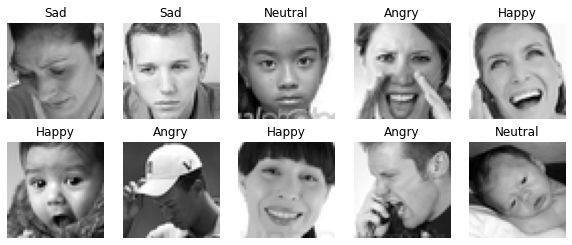

In [19]:
plt.figure(figsize=(10,4))
x,y=2,5
for i in range(10):
    plt.subplot(x,y,i+1)
    plt.imshow(df['pixels'][index[i]],cmap='gray')
    plt.title(emotions[df.iloc[index[i]]['emotion']])
    plt.axis('off')

In [20]:
train=df[df['Usage']=='Training']
test=df[df['Usage']=='PublicTest']
p_test=df[df['Usage']=='PrivateTest']

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
X_train=np.array([i.reshape(48,48) for i in (train['pixels'])]).reshape(-1,48,48,1)
X_test=np.array([i.reshape(48,48) for i in (test['pixels'])]).reshape(-1,48,48,1)
y_train=to_categorical(train['emotion'])
y_test=to_categorical(test['emotion'])

In [23]:
X_train.shape,X_test.shape

((28709, 48, 48, 1), (3589, 48, 48, 1))

In [24]:
y_train.shape,y_test.shape

((28709, 7), (3589, 7))

In [25]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [26]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same',input_shape=(48,48,1),activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=5,strides=2,padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(.5))


model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=128,kernel_size=5,strides=2,padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(.5))


model.add(Conv2D(filters=256,kernel_size=5,strides=2,padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(.5))

model.add(Flatten())

model.add(Dense(128,activation='swish'))

model.add(Dropout(.5))

model.add(Dense(256,activation='swish'))

model.add(Dropout(.5))

model.add(Dense(7,activation='softmax'))

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [28]:
checkpoint_filepath = 'saved_models/'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        51264     
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0

In [30]:
model.fit(X_train,y_train,epochs=50,callbacks=[model_checkpoint_callback],validation_data=(X_test,y_test))

Epoch 1/50
898/898 [==============================] - 18s 17ms/step - loss: 1.8929 - accuracy: 0.2480 - val_loss: 1.6307 - val_accuracy: 0.3410
Epoch 2/50
898/898 [==============================] - 15s 17ms/step - loss: 1.6625 - accuracy: 0.3322 - val_loss: 1.5383 - val_accuracy: 0.4060
Epoch 3/50
898/898 [==============================] - 15s 17ms/step - loss: 1.5536 - accuracy: 0.3840 - val_loss: 1.4598 - val_accuracy: 0.4433
Epoch 4/50
898/898 [==============================] - 15s 16ms/step - loss: 1.4944 - accuracy: 0.4182 - val_loss: 1.6666 - val_accuracy: 0.3438
Epoch 5/50
898/898 [==============================] - 15s 17ms/step - loss: 1.4347 - accuracy: 0.4441 - val_loss: 1.3903 - val_accuracy: 0.4692
Epoch 6/50
898/898 [==============================] - 15s 17ms/step - loss: 1.3885 - accuracy: 0.4655 - val_loss: 1.3809 - val_accuracy: 0.4834
Epoch 7/50
898/898 [==============================] - 15s 17ms/step - loss: 1.3478 - accuracy: 0.4811 - val_loss: 1.3001 - val_accuracy:

In [31]:
model.load_weights(checkpoint_filepath)

In [47]:
model.save("best_model.h5")

In [32]:
result=pd.DataFrame(model.history.history)

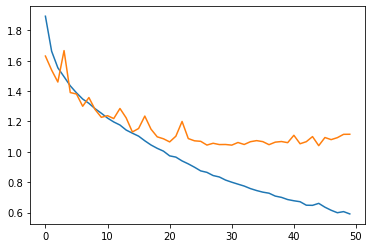

In [33]:
result.loss.plot()
result.val_loss.plot();

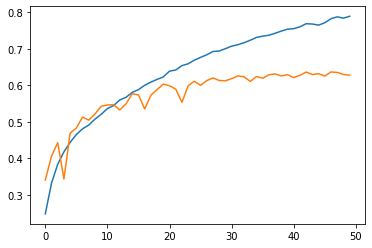

In [34]:
result.accuracy.plot()
result.val_accuracy.plot();

In [35]:
pred=np.argmax(model.predict(X_test),axis=1)

In [36]:
y_test=np.argmax(y_test,axis=1)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.54      0.55      0.55       467
           1       0.86      0.43      0.57        56
           2       0.52      0.40      0.45       496
           3       0.85      0.83      0.84       895
           4       0.51      0.55      0.53       653
           5       0.86      0.74      0.80       415
           6       0.52      0.65      0.58       607

    accuracy                           0.64      3589
   macro avg       0.66      0.59      0.62      3589
weighted avg       0.65      0.64      0.64      3589



In [39]:
print(confusion_matrix(y_test,pred))

[[257   3  45  23  70   9  60]
 [ 18  24   5   1   8   0   0]
 [ 51   1 197  20 121  26  80]
 [ 24   0  12 742  35  11  71]
 [ 77   0  51  27 362   3 133]
 [ 10   0  41  25  10 308  21]
 [ 39   0  28  37 106   1 396]]


In [40]:
private_x=(np.array([i.reshape(48,48) for i in (p_test['pixels'])])).reshape(-1,48,48,1)

In [41]:
private_y=p_test['emotion']

In [42]:
pred_p=np.argmax(model.predict(private_x),axis=1)

In [43]:
print(classification_report(private_y,pred_p))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54       491
           1       0.70      0.42      0.52        55
           2       0.52      0.42      0.46       528
           3       0.86      0.86      0.86       879
           4       0.46      0.54      0.49       594
           5       0.86      0.70      0.77       416
           6       0.55      0.67      0.61       626

    accuracy                           0.64      3589
   macro avg       0.64      0.59      0.61      3589
weighted avg       0.65      0.64      0.64      3589



In [44]:
print(confusion_matrix(private_y,pred_p))

[[257   5  53  20  93   3  60]
 [ 14  23  13   1   3   0   1]
 [ 65   5 222  22 121  28  65]
 [ 18   0  16 752  36   9  48]
 [ 59   0  47  24 320   4 140]
 [  5   0  54  29  12 290  26]
 [ 35   0  23  29 115   2 422]]


In [57]:
df_result=pd.DataFrame()
df_result['predicted']=pred_p
df_result['expected']=list(private_y)

In [111]:
indexes=df_result[df_result['predicted']!=df_result['expected']].sample(15).index

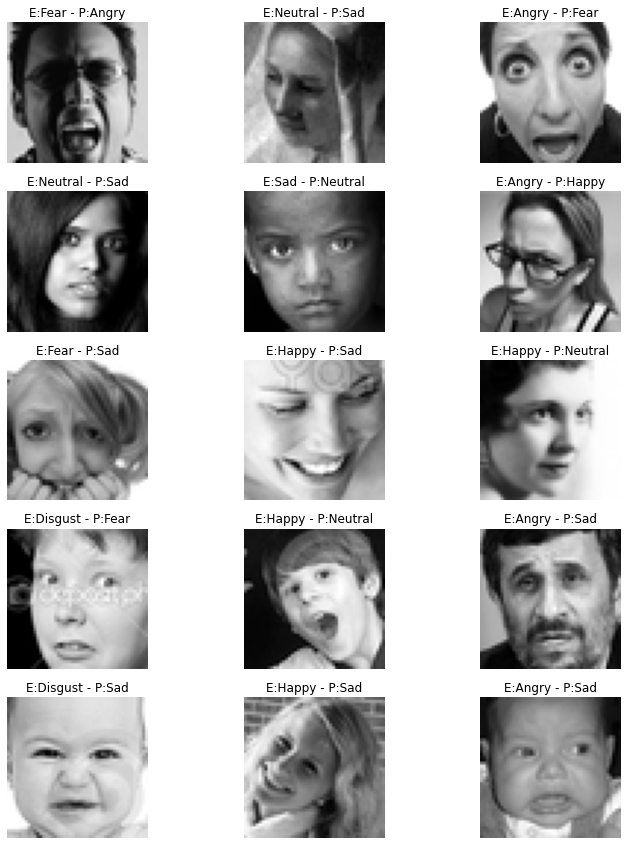

In [112]:
plt.figure(figsize=(12,15))
x,y=5,3
for i in range(15):
    plt.subplot(x,y,i+1)
    plt.imshow(p_test['pixels'].iloc[indexes[i]],cmap='gray')
    plt.title('E:'+emotions[p_test['emotion'].iloc[indexes[i]]]+ ' - ' +'P:'+ emotions[df_result['predicted'].iloc[indexes[i]]])
    plt.axis('off')